# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [35]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

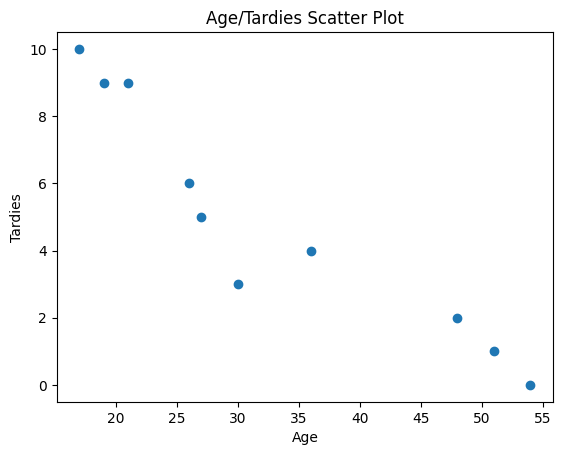

In [55]:
# Your code here
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Age/Tardies Scatter Plot")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*Your explanation here*

The scatter plot reveals a clear trend where younger students tend to have more tardies, often exceeding four, while older students, particularly those aged 45 or older, typically have two or fewer tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [43]:
# your code here
cov_data = student_data[['Age', 'Tardies']].cov()
covariance = cov_data.loc['Age', 'Tardies']
print(f"Covariance {covariance}")

corr_data = student_data[['Age', 'Tardies']].corr()
correlation = corr_data.loc['Age', 'Tardies']
print(f"Correlation {correlation}")

Covariance -45.56666666666666
Correlation -0.9391626886887121


*Your explanation here*

The values generated for both covariance and correlation indicate an inverse relationship between the variables. The negative covariance suggests that as the age of the students increases, there are fewer tardies. The negative correlation further confirms that this relationship is not only inverse but also linear, meaning that age is a good predictor of tardiness, with older students generally having fewer tardies.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [57]:
# your explanation here
X = student_data[['Age']]
y = student_data['Tardies']

student_regression_model = LinearRegression().fit(X, y)
regression_line = student_regression_model.predict(X)

*Your explanation here*

In this regression model, the outcome variable is Tardies, since the aim is to predict the number of tardies based on the independent variable which is Age. The type of regression used here is simple linear regression, since we are modeling the relationship between a single independent variable (Age) and a dependent variable (Tardies). This method fits a straight line to the data, allowing us to make predictions about tardiness based on age.

Plot your regression model on your scatter plot.

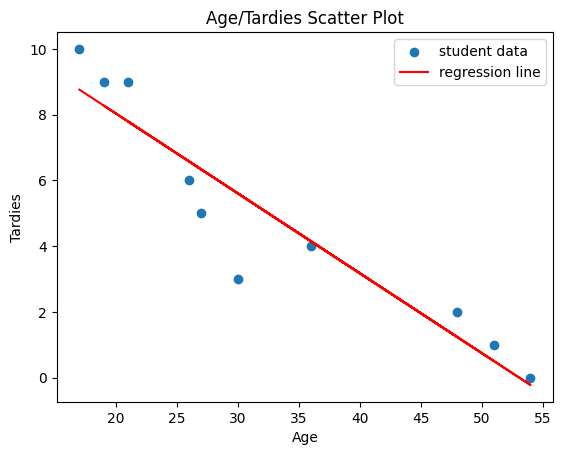

In [80]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'], label='student data')
plt.xlabel("Age")
plt.ylabel("Tardies")

plt.plot(student_data['Age'], regression_line, color='red', label='regression line')

plt.title("Age/Tardies Scatter Plot")
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*Your explanation here*

The regression model shows a strong negative relationship between age and tardiness, meaning that as students get older, they tend to be less tardy. However, while age appears to be a good predictor of tardiness, other factors may also play a role.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [138]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [123]:
# Your code here.
year_data = vehicles[['Year', 'CO2 Emission Grams/Mile']].corr()
year_corr = year_data.loc['Year', 'CO2 Emission Grams/Mile']
print(f"Year correlation: {year_corr}")

cylinders_data = vehicles[['Cylinders', 'CO2 Emission Grams/Mile']].corr()
cylinders_corr = cylinders_data.loc['Cylinders', 'CO2 Emission Grams/Mile']
print(f"Cylinders correlation: {cylinders_corr}")

fuel_barrels_year_data = vehicles[['Fuel Barrels/Year', 'CO2 Emission Grams/Mile']].corr() 
fuel_barrels_year_corr = fuel_barrels_year_data.loc['Fuel Barrels/Year', 'CO2 Emission Grams/Mile']
print(f"Fuel Barrels/Year correlation: {fuel_barrels_year_corr}")

combined_MPG_data = vehicles[['Combined MPG', 'CO2 Emission Grams/Mile']].corr()
combined_MPG_corr = combined_MPG_data.loc['Combined MPG', 'CO2 Emission Grams/Mile']
print(f"Combined MPG correlation: {combined_MPG_corr}")

fuel_cost_year_data = vehicles[['Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
fuel_cost_year_corr = fuel_cost_year_data.loc['Fuel Cost/Year','CO2 Emission Grams/Mile']
print(f"Fuel Cost/Year: {fuel_cost_year_corr}")

Year correlation: -0.22229960295056833
Cylinders correlation: 0.7523925537297477
Fuel Barrels/Year correlation: 0.9861886621428763
Combined MPG correlation: -0.9262290389336436
Fuel Cost/Year: 0.9308651512201764


#### Your answer here

Based on the correlation values generated above, Fuel Barrels/Year stands out as the most important variable in determining CO2 emissions, with a very strong positive correlation of 0.986. This value suggests that as Fuel Barrels/Year increases, CO2 emissions also rise significantly. On the other hand, Year shows the weakest correlation with CO2 emissions at -0.222, indicating that the vehicle's year has minimal influence on CO2 emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [135]:
# Your code here.
X = vehicles[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

y = vehicles[['CO2 Emission Grams/Mile']]

vehicle_regression_model = LinearRegression().fit(X,y)

#### Your answer here

The regression being used in this exercise is multiple lineal regression in order to model the relationship between one dependant variable, which
in this case is 'CO2 Emission Grams/Mile' and mutiple independent variables which are (Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year).

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [184]:
# Your code here.
vehicles.columns = vehicles.columns.str.replace(' ', '_').str.replace('/', '_')

formula = 'CO2_Emission_Grams_Mile ~ Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year'

model = smf.ols(formula=formula, data=vehicles).fit()

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 4.470e+05
Date:                     Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                             16:49:24   Log-Likelihood:            -1.5226e+05
No. Observations:                    35952   AIC:                         3.045e+05
Df Residuals:                        35947   BIC:                         3.046e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

#### Your answer here

The most important variable in the model is 'Fuel Barrels/Year' because it has the largest effect on CO2 emissions, since using more fuel leads to higher emissions. The 'Combined MPG' is also an important variable because better fuel efficiency significantly reduces emissions. We can conclude from the model that reducing fuel usage and improving vehicle efficiency are the best ways to lower CO2 emissions. The model is very reliable since it explains 98% of the variation in emissions, and all variables are statistically significant.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [209]:
# Your code here.
party_df = pd.DataFrame({'People Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'People who attended': [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

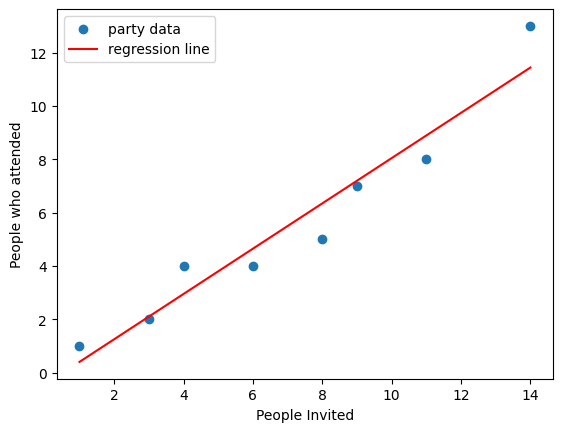

In [212]:
# Your code here.
X = party_df[['People Invited']]
y = party_df['People who attended']

party_model = LinearRegression().fit(X,y)
regression_line = party_model.predict(X)

plt.scatter(party_df['People Invited'], party_df['People who attended'], label='party data')

plt.plot(party_df['People Invited'], regression_line, color='red', label='regression line')

plt.xlabel("People Invited")
plt.ylabel("People who attended")

plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*Your explanation here*

The scatter plot and regression line suggest a likely relationship between the number of people invited and the number of people who attended, with a general positive trend where as the number of invitations increases, attendance also tends to rise. However, the points are not perfectly aligned with the regression line, indicating some variability in attendance that the linear model doesn’t fully capture.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

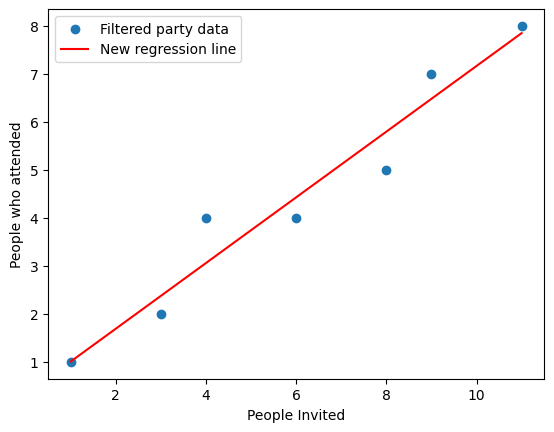

In [219]:
# Your response here
Q1_invited = party_df['People Invited'].quantile(0.25)
Q3_invited = party_df['People Invited'].quantile(0.75)
IQR_invited = Q3_invited - Q1_invited

Q1_attended = party_df['People who attended'].quantile(0.25)
Q3_attended = party_df['People who attended'].quantile(0.75)
IQR_attended = Q3_attended - Q1_attended

# Define the outlier thresholds for both columns
outlier_threshold_low_invited = Q1_invited - 1.5 * IQR_invited
outlier_threshold_high_invited = Q3_invited + 1.5 * IQR_invited

outlier_threshold_low_attended = Q1_attended - 1.5 * IQR_attended
outlier_threshold_high_attended = Q3_attended + 1.5 * IQR_attended

# Filter the data by removing outliers in both columns
filtered_party_df = party_df[(party_df['People Invited'] >= outlier_threshold_low_invited) &
                             (party_df['People Invited'] <= outlier_threshold_high_invited) &
                             (party_df['People who attended'] >= outlier_threshold_low_attended) &
                             (party_df['People who attended'] <= outlier_threshold_high_attended)]

# Refit the model with the filtered data
X_filtered = filtered_party_df[['People Invited']]
y_filtered = filtered_party_df['People who attended']

party_model_filtered = LinearRegression().fit(X_filtered, y_filtered)
regression_line_filtered = party_model_filtered.predict(X_filtered)

# Plot the filtered data and the new regression line
plt.scatter(filtered_party_df['People Invited'], filtered_party_df['People who attended'], label='Filtered party data')
plt.plot(filtered_party_df['People Invited'], regression_line_filtered, color='red', label='New regression line')

# Labels and legend
plt.xlabel("People Invited")
plt.ylabel("People who attended")
plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*Your explanation here*

By removing the outlier utilizing the interquartile range (IQR) method, the clarity of the relationship between the number of people invited and the number who attended became more clear. Before removing the outlier, the scatter plot showed a potential linear trend, but the outlier seemed to distort the regression line, making the relationship appear less clear. After filtering out the extreme data point, the scatter plot exhibited a stronger and more evident linear relationship, with the regression line now more accurately reflecting the overall trend. This suggests that the relationship between the two variables is likely linear, and the model without the outlier provides a more reliable fit, offering more confidence in the conclusions drawn from the data.